### Import Libraries

In [42]:
import pandas as pd
import numpy as np
from summarytools import dfSummary
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import  train_test_split

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [43]:
df = pd.read_csv('../data/Math.csv', sep=';', encoding='ISO-8859-1')


### Data Exploration

In [44]:
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [46]:
df.describe()

,Student ID,Question ID,Type of Answer
count,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259
std,460.590559,249.244061,0.499018
min,26.000000,77.000000,0.000000
25%,380.000000,323.000000,0.000000
50%,885.000000,428.000000,0.000000
75%,1219.000000,571.000000,1.000000
max,1565.000000,1549.000000,1.000000


In [47]:
dfSummary(df, is_collapsible=False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Student ID[int64],Mean (sd) : 775.4 (460.6)min < med < max:26.0 < 885.0 < 1565.0IQR (CV) : 839.0 (1.7),372 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsklEQVR4nO3cz4raQBzA8d/UVaJCggh68wUKPXj0IfqwfYQefALfwJsgIWK6wZikh9JF6FbNjNH5Dd/PeTObw5dO50/WNE0jgO++vPoFgHu83foBY8xQRAaW45+apnm3fBb4cDVUY8xwOp1+j+N4YjP44XBIjTE/iBWubv2LOojjeLJard6TJCnaDJxlWbReryf7/X4gIoQKJzenfhGRJEmK2Wz2y2L8ocUzwD9YTEEFQoUKhAoVCBUqECpUIFSoQKhQgVChwl0b/tAj1LsZhBqQkO9mEGpYgr2bQaiecZy647qu+0mSpKHdzSBUj7hO3WVZRlVVfS2K4qeI2ITqLUL1i/XULSKy3W4nm81mdD6fe1283CsRqodsr1Wmaert1O2KfVSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUMHrI9RQLwGjPW9DDfkSMNrzNlQJ+BIw2vM5VBHhD7ThDxZTUIFQoYL3Uz+ep6qqvojExhjbITrbaSFUiIhInuf9siy/LRaLXq/Xa/0ZjEi3Oy2E2gGH/d+4ruv+o9/nHqfT6S2KotFyuSzm83na9vmud1qCDfVV05jL/q8PX5GOx2PbXRaRDndaggz1xdOY9f5vyF+RugoyVB+mMZv935C/InUVZKh/+TqNoT32UaECoUIFQoUKhAoVCBUqECpUCHp7Cs/leBp49SSQUPEQrqeBt04CCRUP4XIaeM9JIKHioRxOA6+eBLKYggqEChWY+v/DYQX7ssvPISPUT7isYH24/BwiQv2EywqWy8/dINQrbFawXH7uBospqECoUKHTqd/x7JfVMz50Fqrr2S+rZ1zqLFTXL0FZPeNS56t+27NfVs+4xGIKKhAqVCBUqHDX/1GzLIvaDnw8HiMRkTzPo91uN3rm81p/t9b3dn3+nr5+A5EGvMXYDrlqAAAAAElFTkSuQmCC"">",0(0.0%)
2,Student Country[object],1. Portugal2. Lithuania3. Italy4. Slovenia5. Ireland6. Russian Federation7. Romania8. Spain,"5,495 (57.6%)1,443 (15.1%)1,358 (14.2%)755 (7.9%)300 (3.1%)107 (1.1%)60 (0.6%)28 (0.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaUlEQVR4nO3dQU7bUBiF0d9RRJuJoygSS2hnLIBFsNguIgtg2D2gCA8aYJIOSimEMEjgXVfhnBU8VV9tbPlCt91uCxImYx+Az0NsxIiNGLERIzZixEZMV1Wzqjob+yAn7mG73W7GPsTYpsvl8qrv+8XYBzllwzCsu6778dmDm/Z9v7i8vNzM5/O7sQ9zim5vb7+uVqvFzc3NWVV97tiqqubz+d35+fmvsQ9zwmZjH+B/4AGBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IiZVv35DGbsg5wq/7b/TIdhWK9Wq0X5DKaZYRjWVfUw9jnG5rPwDJ+FV1Xn1y+Q0vrK5n80T5oOXgw9eK7Z4MXQg12tBy+ecHnipS4xYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEdNs8GLowa6mgxdDD57zWTgxBi/EeEAgpuVt1C2UF5qtqyyr2NVkXWVZxT4t11WWVbzgAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiGmyrrKsYp9m6yrLKnb5LJwY6ypijrmyuWJxlIMHL4YsHOugwYshC+9xzODFkIWjeKlLjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMQcNHgxZOE9Dh68GLJwLJ+FE2PwQowHBGLeuo26VfLh9q6rLKho4dW6yoKKVt5aV1lQ8eE8IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMa/WVRZUtLJ3XWVBRQs+CyfGuoqY51c2VzOaehq8GLnQ2qTv+8XFxUU9Lqxa/ClIqKrH92yz2ex+7INw+rzUJUZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMpKpqs9l8GfsgnL7JMAzr6+triyqas0EgxrqKmL9XtnJVo7Xpcrm8qqqyrKK1Sd/3C8sqErxnI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IiZPg5dqoxdaMxn4cQYvBDjZzZiJl3Xfe+6zt8YpblJVX2rKr9+gebcRokRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMpKp+VtX92Afh9Bm8EOM2SozYiBEbMWIjRmzEiI2Y35IST3t9PRJOAAAAAElFTkSuQmCC"">",0(0.0%)
3,Question ID[int64],Mean (sd) : 478.9 (249.2)min < med < max:77.0 < 428.0 < 1549.0IQR (CV) : 248.0 (1.9),833 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cT24aMRiH4c+FoIFIgxAV7LhApS5Y5hA9bI7QSJwgN8gOaYQ8gkKBYbpqV2kS7JkyP/d99k68eGXmn+3qujag6z7degLAR/RvPYG3OOeGZjYIHH6s63rf5HxwO50N1Tk3nE6n3/I8n4SML8ty45x7JNY0dDZUMxvkeT55eHjYj8fjwzUDvffZarWaFEUxMDNCTUCXQzUzs/F4fJjNZj8Chg4bnwxuhpspSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSGj1pJTIQ87yy+Vy1+R8oKu1UGMPOTudTllVVV8Oh8N3Mws50gcJaXNFDT7kzMzs5eVl8vz8PDqfz702JgctrR+SFnrI2Waz4ZAz/MHNFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiS8+z1qxHYStpKgMW+GGrOdhK0kaNJ7K2rwdhL1rSSRGxOPdV3vm5zP/+5DW1FCtpMobyWJ3ZhYluXGOfdIrM1pfc+UqOBfEu99tlqtJkVRDMyMUBtCqG8I3ZhoZrK/Jl2VbKhVVd2ZWe6cCxnOE4uOSTLU3W53dzqdvi4Wi16v17v6TAGeWHRPkqEej8d+lmWj5XJ5mM/nm2

In [48]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Student ID', 'Question ID', 'Type of Answer']

We have 5 categorical features : ['Student Country', 'Question Level', 'Topic', 'Subtopic', 'Keywords']


### Univariate Analysis

#### 1. Numerical features

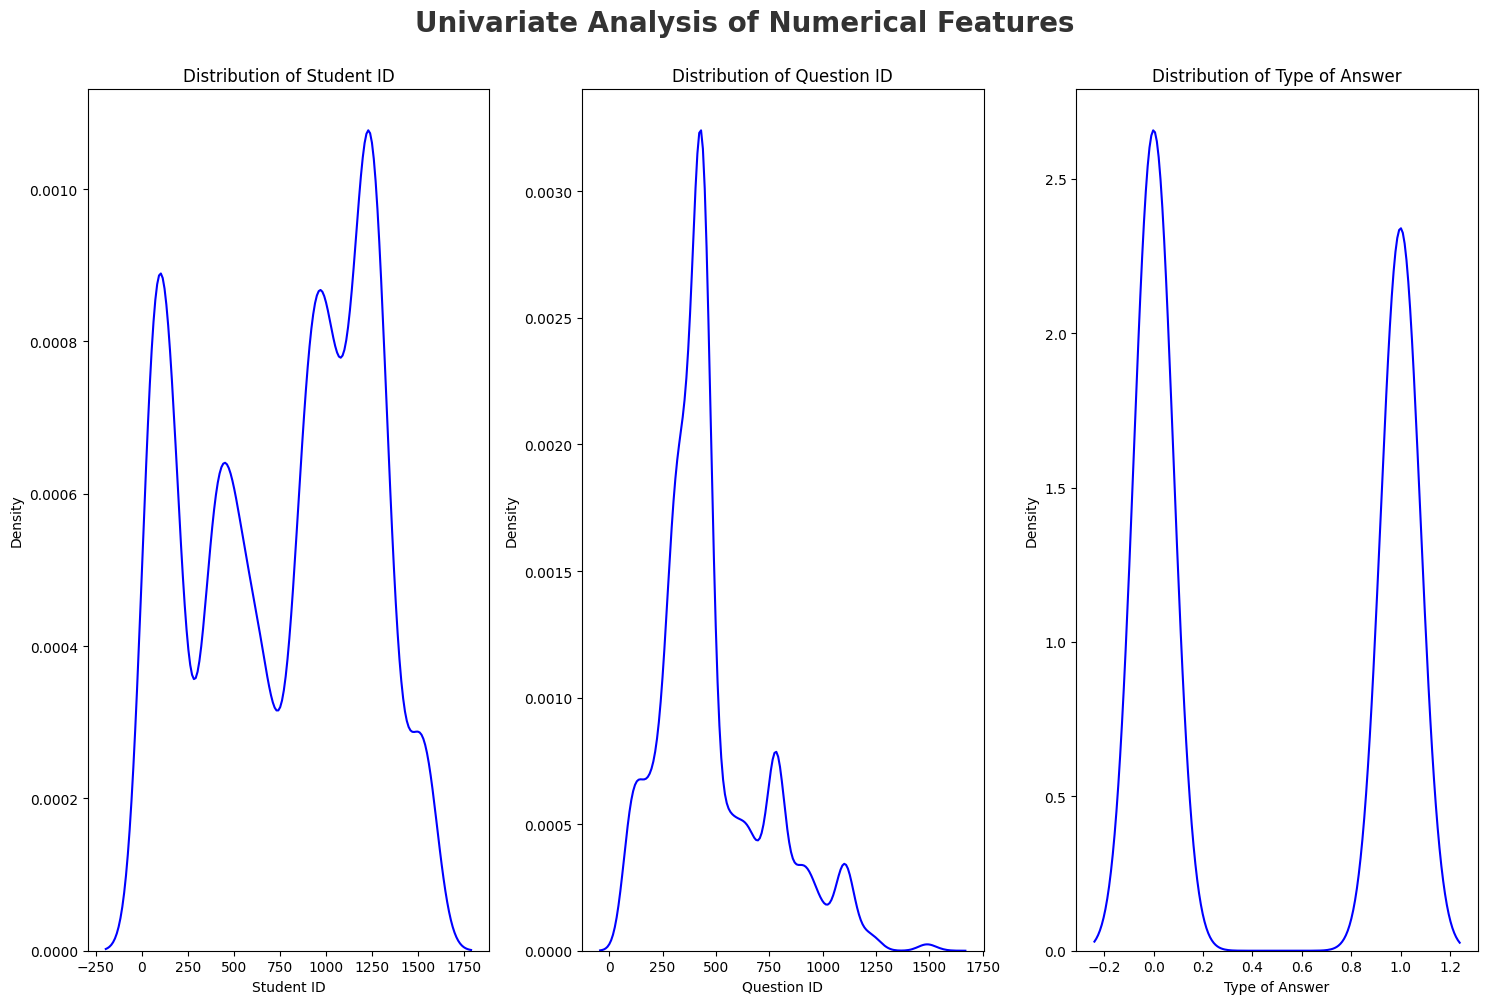

In [49]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Calculate number of rows needed
n_features = len(numeric_features)
n_rows = (n_features + 2) // 3  # Ceiling division by 3 to get number of rows

for i in range(n_features):
    plt.subplot(n_rows, 3, i+1)
    sns.kdeplot(data=df, x=numeric_features[i], color='blue')
    plt.title(f'Distribution of {numeric_features[i]}')
    plt.xlabel(numeric_features[i])
    
plt.tight_layout()


#### 2. Categorical Features

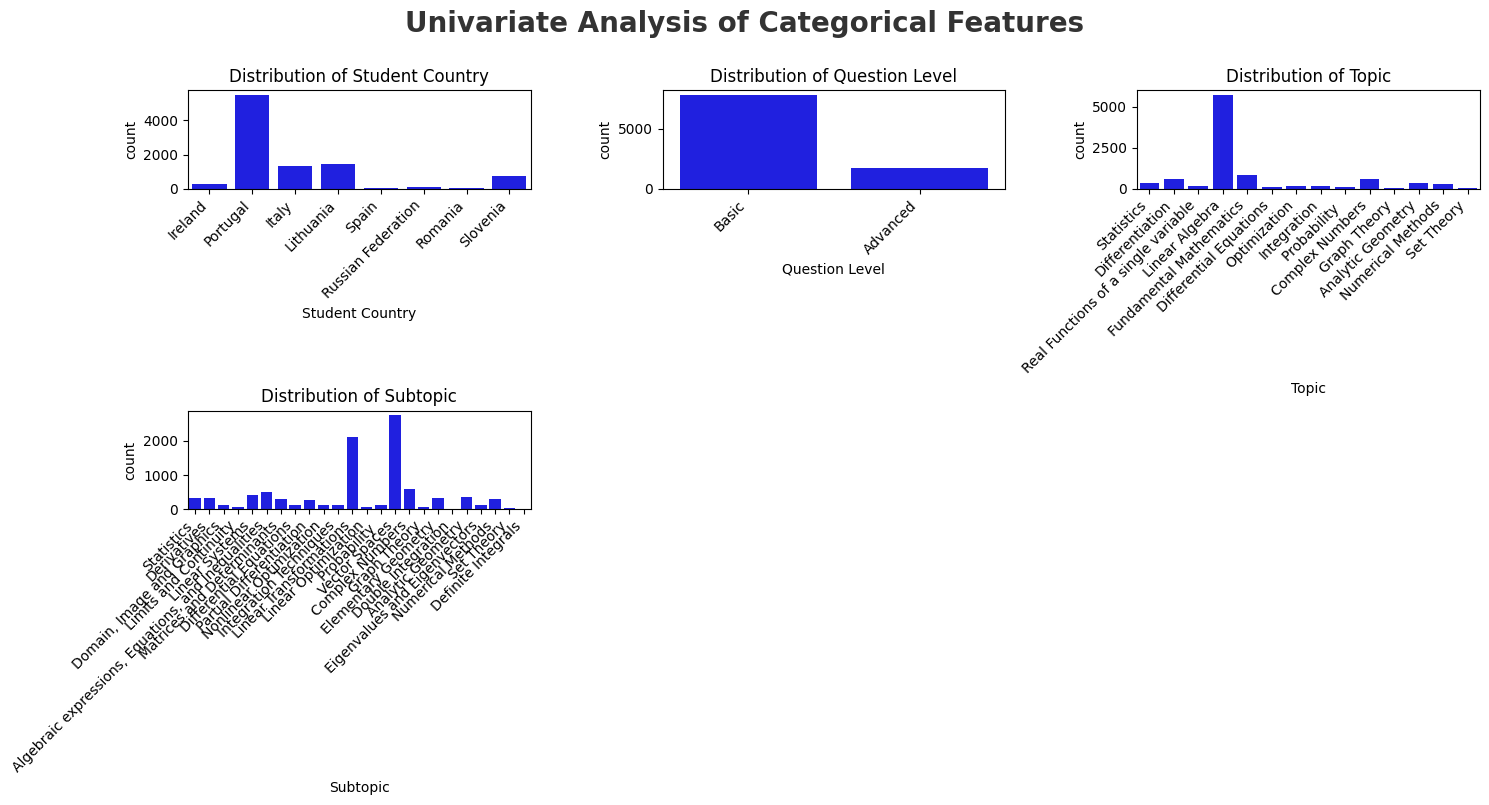

In [50]:
# exclude keywords feature (too many keywords so we visualize in next cell)
features_to_exclude = ['Keywords']  # Add the names of features you want to exclude
selected_categorical_features = [feat for feat in categorical_features if feat not in features_to_exclude]

# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Calculate number of rows needed
c_features = len(selected_categorical_features)
c_rows = (c_features + 2) // 3  # Ceiling division by 3 to get number of rows


for i in range(c_features):
    plt.subplot(c_rows, 3, i+1)
    sns.countplot(data=df, x=selected_categorical_features[i], color='blue')
    plt.title(f'Distribution of {selected_categorical_features[i]}')
    plt.xlabel(selected_categorical_features[i])
    plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(hspace=1)

plt.tight_layout()


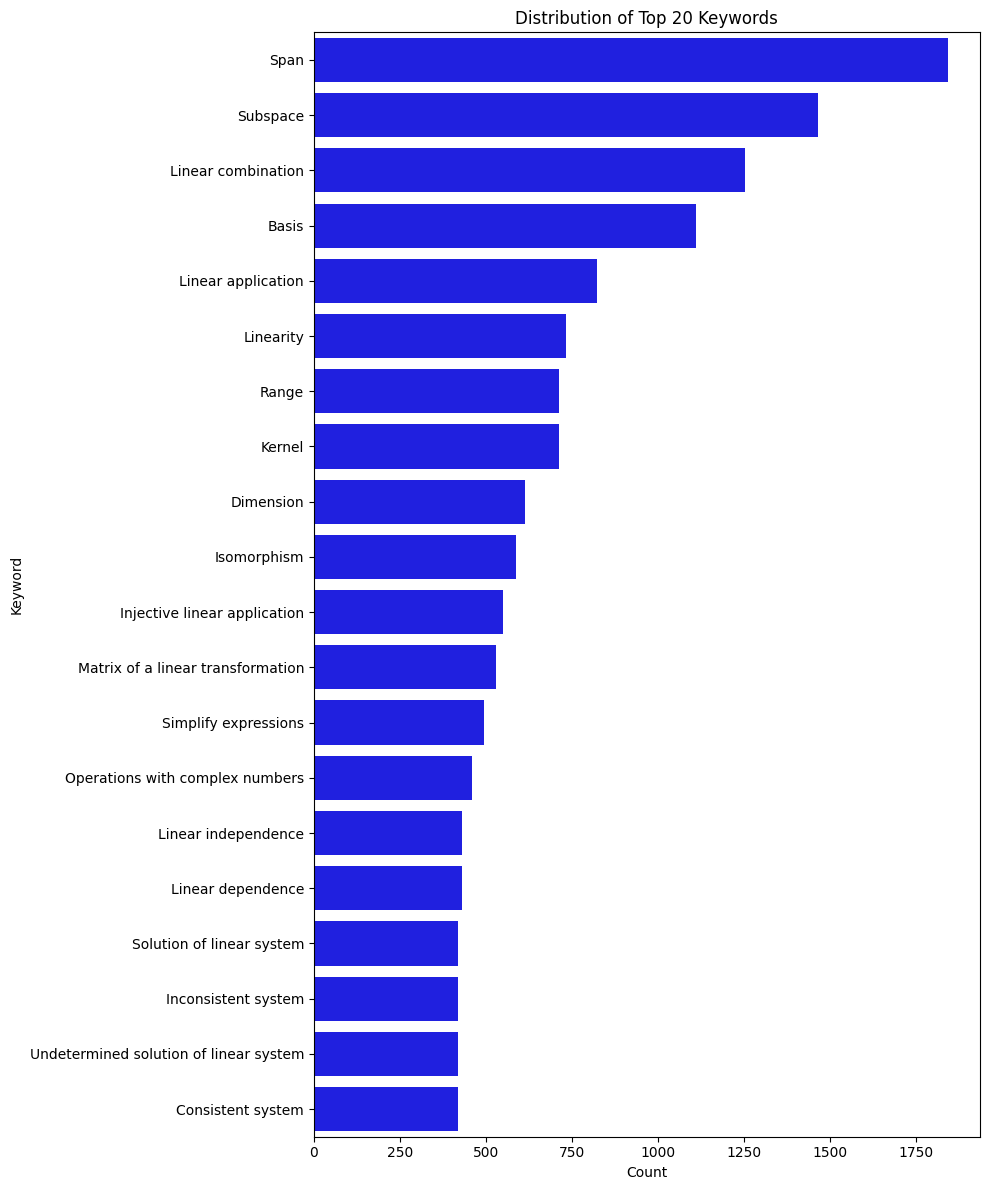

In [52]:
# Split and get counts
keywords_counts = (df.Keywords
                  .str.split(',')                  
                  .explode()                       
                  .str.strip()                     
                  .value_counts()                  
                  .reset_index())                  
keywords_counts.columns = ['Keyword', 'Count']     

# Plot top 20
plt.figure(figsize=(10, 12))
sns.barplot(data=keywords_counts.head(20), 
           y='Keyword', 
           x='Count', 
           orient='h',
           color='blue')
plt.title('Distribution of Top 20 Keywords')
plt.tight_layout()